# PROBLEM 3.1

Rene L. Principe Jr. 
2015-04622

In [85]:
from numpy.fft import rfft, irfft

def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a

def idst(a):
    N = len(a)
    c = np.empty(N+1)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = -irfft(c)[:N]
    y[0] = 0.0

    return y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


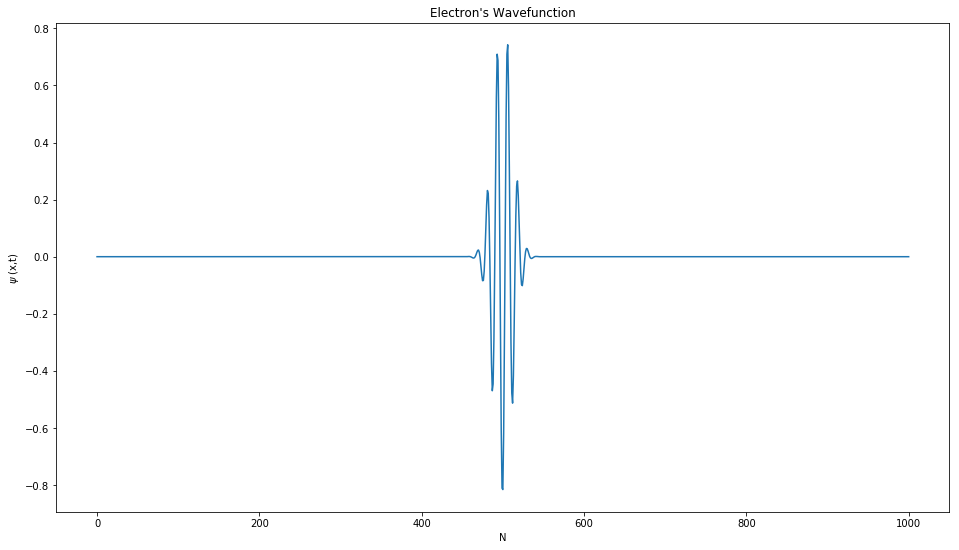

In [99]:
h = 2e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 

a = L/N

def cmplx(t):	
    def f(y):
        return t(np.real(y)) + 1j*t(np.imag(y))

    return f

ksi = np.zeros(N+1)

def ksi0(x):
    x0 = L/2
    sigma = 1e-10
    k = 5e10
    return np.exp(-(x-x0)**2/2/sigma**2)*np.exp(1j*k*x)

x = np.linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0

b_0 = dst(ksi)
t = 10e-16
b_list = b_0*np.exp(1j*np.pi**2*hbar*np.arange(1,N+2)**2/2/M/L**2*t)

ksi_list = idst(b_list)


plt.plot(ksi_list)
plt.rcParams["figure.figsize"] = [16,9]
plt.xlabel("N")
plt.ylabel("$\psi$ (x,t)")
plt.title("Electron's Wavefunction")
plt.show()


coefficients are

In [98]:
b0

array([ 0.00000000e+00,  4.56008381e-05, -5.75832837e-05, ...,
       -9.67690859e-14,  8.36133327e-16,  9.60739836e-14])